# CHAPTER 10 - SIMPLE LINEAR REGRESSION

## By Angela Mills

## What does a Simple Linear Regression Model do?
#### It estimates the relationship between two quantitative variables.

In [214]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [215]:
data = sns.load_dataset('diamonds') 

In [216]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Pearson Correlation Coefficient (r-value)
+ The r-value measures the strength and direction of the linear relationship between two variables.
+ Its range is between -1 and 1.
+ Positive Correlation: r > 0 indicates a positive linear relationship.
+ Negative Correlation: r < 0 indicates a negative linear relationship.
+ No Correlation: r = 0 indicates no linear relationship.

In [218]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
corr = numeric_data.corr()
corr.head(7)



,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


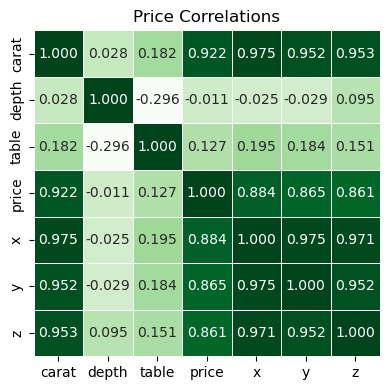

In [292]:
import matplotlib.pyplot as plt
price_corr = corr['price'].sort_values(ascending=False).to_frame()
plt.figure(figsize=(4, 4))
sns.heatmap(corr, annot=True, fmt='.3f', cmap= 'Greens' , cbar=False , linewidths=0.5)
plt.title('Price Correlations')
plt.tight_layout()
plt.show()


## Procedure for Creating and Using a Regression Model
* Identify and prepare the dataset.
* Split the dataset into training and testing sets.
* Train the regression model using the training set.
* Evaluate the model and make predictions.

In [221]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

In [312]:
X = data[['carat']].values
y = data['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (37758, 1)
X_test shape: (16182, 1)
y_train shape: (37758,)
y_test shape: (16182,)


In [316]:
model = LinearRegression()

print(model)

LinearRegression()


In [318]:
model.fit(X_train, y_train)

print(model)


LinearRegression()


In [225]:
score = model.score(X_test, y_test)
print(f"Model Score: {score}")



Model Score: 0.8504107786474794


In [324]:
y_pred = model.predict(X_test)
pd.DataFrame(y_pred, columns=['Predicted Price'])

,Predicted Price
0,9540.641914
1,1940.075433
2,3180.984246
3,2327.859437
4,4421.893059
...,...
16177,156.269013
16178,5585.245072
16179,9618.198715
16180,-464.185393


In [227]:
predicted_df = pd.DataFrame(y_pred, columns=['predicted_price'])
predicted_df.head(3)

,predicted_price
0,9540.641914
1,1940.075433
2,3180.984246


In [228]:
results_df = pd.DataFrame(X_test, columns=['carat'])
results_df['price'] = y_test
results_df['predicted_price'] = y_pred
results_df.head()

,carat,price,predicted_price
0,1.52,8674,9540.641914
1,0.54,1637,1940.075433
2,0.70,2657,3180.984246
3,0.59,1838,2327.859437
4,0.86,2980,4421.893059


In [330]:
melted_df = pd.melt(results_df, id_vars=['carat'], value_vars=['price', 'predicted_price'], 
                         var_name='Type', value_name='Price')
print("First 5 rows:")
print(melted_df.head())
print("\nLast 5 rows:")
print(melted_df.tail())

melted_df.head()

First 5 rows:
   carat   Type   Price
0   1.52  price  8674.0
1   0.54  price  1637.0
2   0.70  price  2657.0
3   0.59  price  1838.0
4   0.86  price  2980.0

Last 5 rows:
       carat             Type        Price
32359   0.31  predicted_price   156.269013
32360   1.01  predicted_price  5585.245072
32361   1.53  predicted_price  9618.198715
32362   0.23  predicted_price  -464.185393
32363   1.00  predicted_price  5507.688271


,carat,Type,Price
0,1.52,price,8674.0
1,0.54,price,1637.0
2,0.70,price,2657.0
3,0.59,price,1838.0
4,0.86,price,2980.0


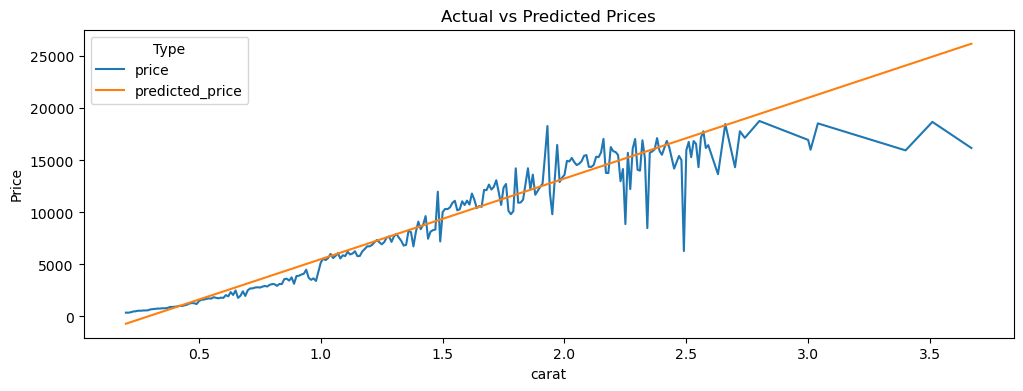

In [310]:
plt.figure(figsize=(12, 4))
sns.lineplot(data=melted_df, x='carat', y='Price', hue='Type', errorbar=None)
plt.title('Actual vs Predicted Diamond Prices')
plt.title("Actual vs Predicted Prices")
plt.show()

## The Math Behind Linear Regression

* The equation of a line is: **y = mx + b**
* Where:
  * **y** is the dependent variable (price)
  * **m** is the slope
  * **x** is the independent variable (carat)
  * **b** is the y-intercept


In [232]:
X = data.carat.values.reshape(-1,1)
y = data.price

In [233]:
lr = LinearRegression()
predicted = lr.fit(X,y)

In [234]:
m = predicted.coef_
b = predicted.intercept_
print(f'The slope is {m} and the y-intercept is {b}')

The slope is [7756.42561797] and the y-intercept is -2256.3605800452183


In [235]:
print(f'Regression line equation is y = {m}x + {b}')

Regression line equation is y = [7756.42561797]x + -2256.3605800452183


In [236]:
price_70 = m[0] * 0.70 + b
print(f'The predicted price for a 0.70 carat diamond is ${price_70:,.2f}')

The predicted price for a 0.70 carat diamond is $3,173.14


In [237]:
price_54 = m[0] * 0.54 + b
print(f'The predicted price for a 0.54 carat diamond is ${price_54:,.2f}')


The predicted price for a 0.54 carat diamond is $1,932.11


Yes, the estimates are close to the predicted prices in step 18.
